## DBSCAN and Agglomerative Clustering

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

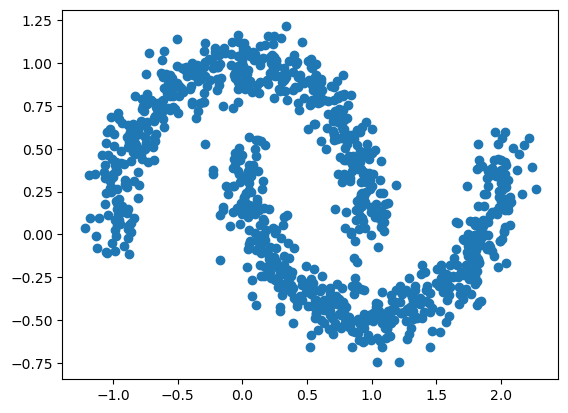

In [2]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples = 1000, noise=.1, random_state=42)[0]
plt.scatter(moons[:,0], moons[:,1])

In [3]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
circles = scaler.fit_transform(moons)

### Cluster the data with DBSCAN

In [4]:
## Cluster with DBSCAN
# Set min_samples=30
min_samples = 30

# Use NearestNeighbors to find a good value for 'eps'
neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors.fit(moons)
distances, indices = neighbors.kneighbors(moons)
distances[:5]

array([[0.        , 0.0169689 , 0.03320547, 0.03571159, 0.04090796,
        0.05256796, 0.06196139, 0.06283235, 0.07497139, 0.09412639,
        0.10615668, 0.12016565, 0.12446092, 0.13443247, 0.13650866,
        0.14311466, 0.15393535, 0.15654712, 0.15675518, 0.15678159,
        0.15852019, 0.16105405, 0.16438455, 0.17753924, 0.18033088,
        0.18495071, 0.18857992, 0.18903718, 0.19531746, 0.20224291],
       [0.        , 0.01992972, 0.02442595, 0.03653081, 0.0432819 ,
        0.05071889, 0.06128177, 0.06866597, 0.06980505, 0.07335879,
        0.08968879, 0.09855972, 0.10054963, 0.10101019, 0.10350026,
        0.10358397, 0.11096583, 0.1175126 , 0.12078347, 0.12362918,
        0.12828078, 0.13557068, 0.13679224, 0.13779215, 0.14183455,
        0.14838895, 0.14922972, 0.15008346, 0.1507293 , 0.15088995],
       [0.        , 0.04711226, 0.04825653, 0.07902221, 0.09369886,
        0.09715531, 0.09734895, 0.11107343, 0.1197102 , 0.14340495,
        0.16567716, 0.17333307, 0.17599576, 0.

In [5]:
# Obtain the furthest distance for each point
farthest_distances = distances[:, -1]
# Sort the furthest distance for each point
sorted_distances = np.sort(farthest_distances)
sorted_distances[0:5]

array([0.1034413 , 0.10388561, 0.10629636, 0.10670134, 0.10706481])

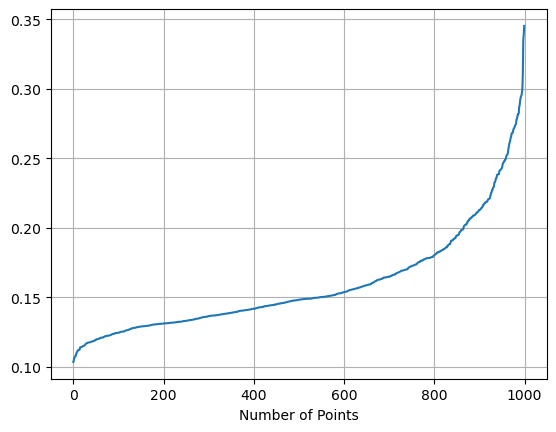

In [13]:
# Plot the distances required for points to be included in a cluster with min sample of 30
plt.plot(sorted_distances)
plt.xlabel("Number of Points")
plt.grid();

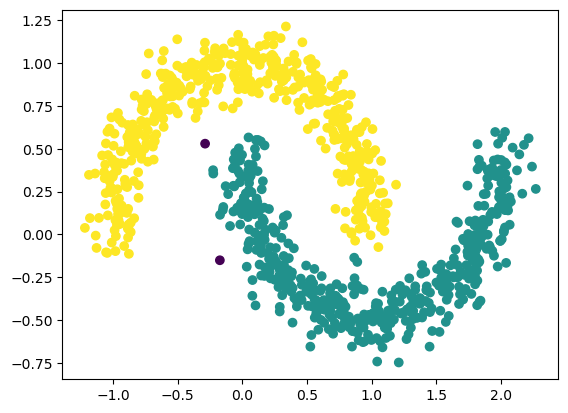

In [7]:
# Create a DBSCAN model and fit it to the data using the chosen params
# Instantiate and fit clustering - done in one step for DBSCAN
dbs = DBSCAN(eps = 0.21, min_samples = min_samples).fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=dbs.labels_);

### Cluster the datat with Agglomerative Clustering

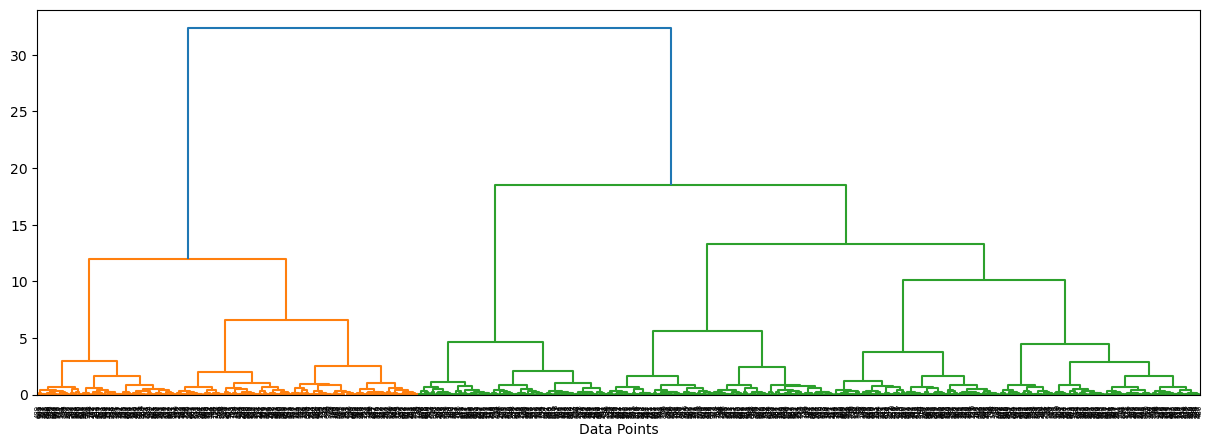

In [8]:
## Create a dendrogram and find where the average length of the vertical lines is longest
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(moons, method = 'ward'))
plt.xlabel('Data Points');

In [9]:
# Create and fit an agglomerative clustering model on the data
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(moons)

AgglomerativeClustering()

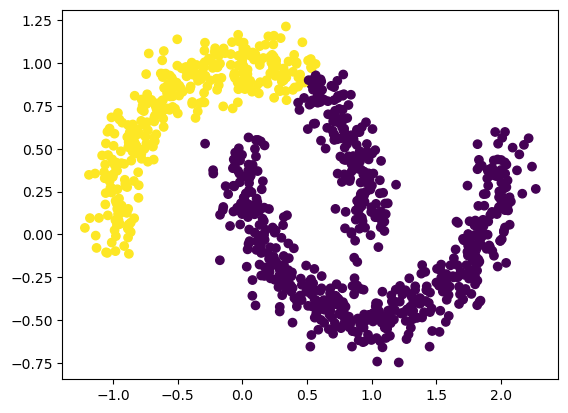

In [10]:
# Visualize the clusters
plt.scatter(moons[:,0], moons[:,1], c=hc.labels_)

### Summary

In this instance, DBSCAN did a better job separating the points into appropriate clusters. Although it did not produce the best results this time, the Agglomerative Clustering model was much easier to tune.